In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch

In [3]:
release_pos = np.load('./release_pos_1e8.npy')
velosity_matrix = np.load('./velosity_matrix_1e8.npy')
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

(6565275, 3)


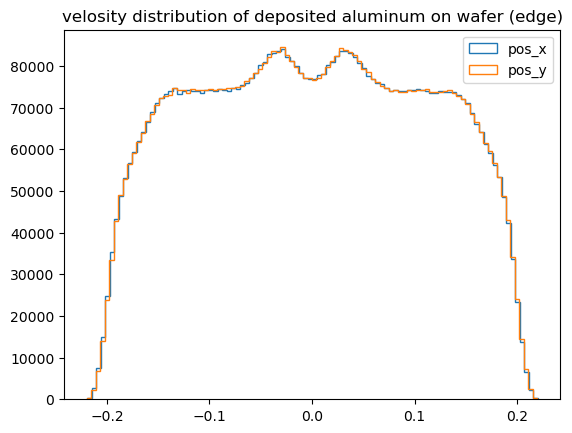

In [4]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275, 3)


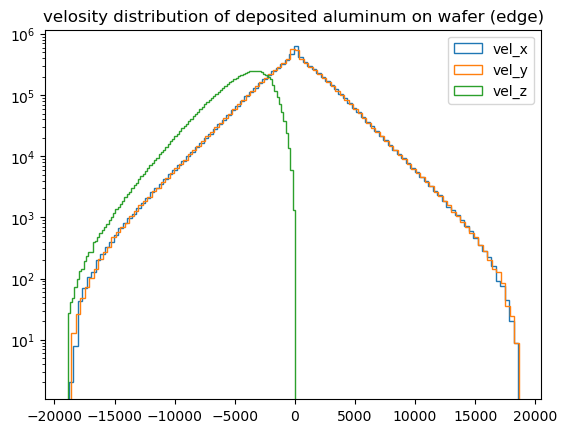

In [5]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [6]:
TS = 0.3 #300mm
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

-0.2192283690130521
0.219774927605747
-0.21972756268358049
0.2194524202704513


In [7]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-7, temperature=300, cellSize=[240, 240, 150], celllength=0.48/240, chamberSize=[0.24, 0.24], DXsec=DXsec_Al)
transport.setXsec(energy_range=[0, 50, 50])

l:\ysy\etching\CollisionModule.py:70: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))


array([0.00000000e+00, 2.48469445e-19, 2.13253357e-19, 1.95014882e-19,
       1.83028518e-19, 1.74240899e-19, 1.67375019e-19, 1.61781505e-19,
       1.57087507e-19, 1.53060285e-19, 1.49545376e-19, 1.46435341e-19,
       1.43652611e-19, 1.41139470e-19, 1.38851878e-19, 1.36755521e-19,
       1.34823170e-19, 1.33032883e-19, 1.31366734e-19, 1.29809902e-19,
       1.28350001e-19, 1.26976583e-19, 1.25680757e-19, 1.24454901e-19,
       1.23292430e-19, 1.22187624e-19, 1.21135481e-19, 1.20131605e-19,
       1.19172114e-19, 1.18253562e-19, 1.17372878e-19, 1.16527314e-19,
       1.15714403e-19, 1.14931921e-19, 1.14177857e-19, 1.13450388e-19,
       1.12747855e-19, 1.12068745e-19, 1.11411676e-19, 1.10775379e-19,
       1.10158690e-19, 1.09560536e-19, 1.08979929e-19, 1.08415954e-19,
       1.07867764e-19, 1.07334573e-19, 1.06815650e-19, 1.06310317e-19,
       1.05817939e-19, 1.05337924e-19])

In [8]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-3)

running: 100%|██████████████████████████████████████████████████████| 100/100 [28:59<00:00, 17.4s/B]


In [9]:
np.save('transport_TS300_result_posvel', result[2])

In [10]:
np.save('transport_TS300_result_collisionPos', result[1])

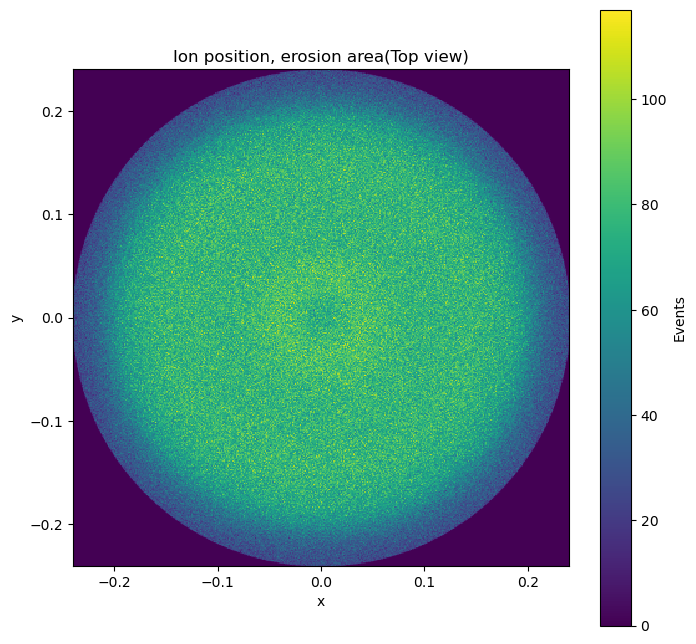

In [12]:
x_erosion_np = result[1][:,0]
y_erosion_np = result[1][:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

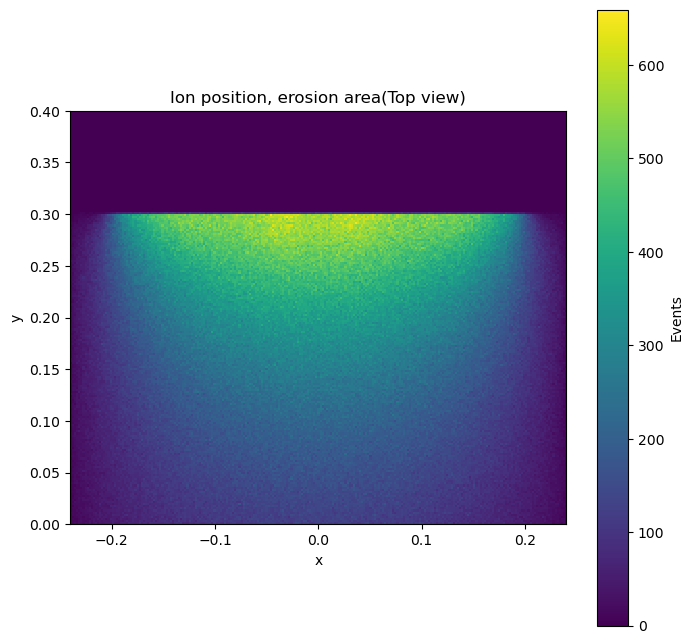

In [14]:
x_erosion_np = result[1][:,0]
z_erosion_np = result[1][:,2]

xbins = np.linspace(-0.24,0.24,240)
zbins = np.linspace(0,0.4,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [15]:
depo_pv = result[2]
a = np.array(depo_pv)
print(a.shape)

(2722016, 6)


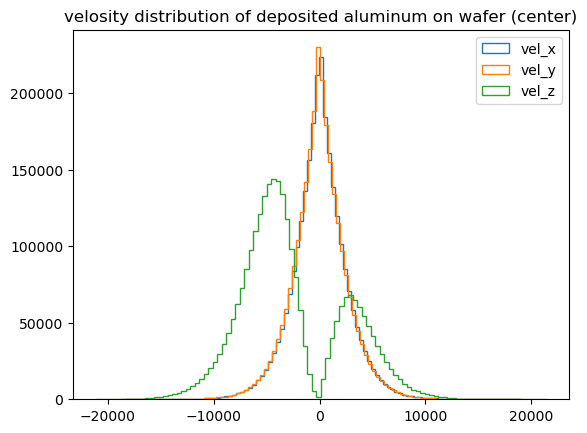

In [16]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

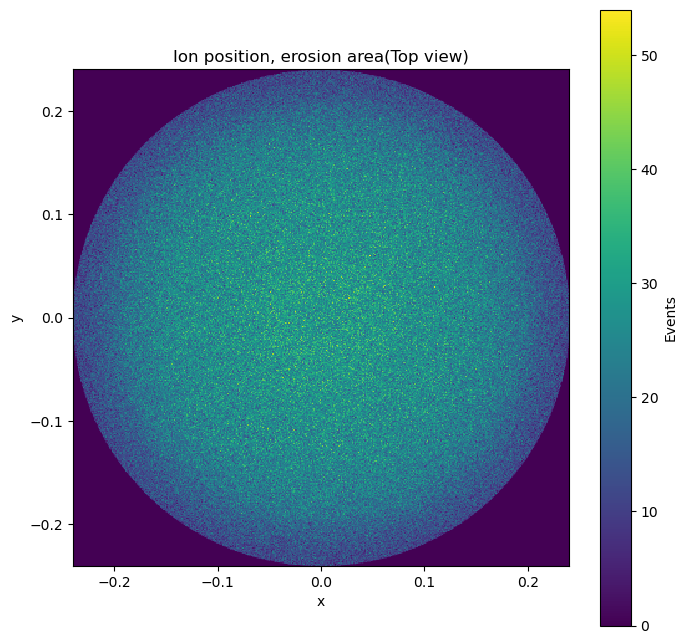

In [17]:
x_erosion_np = a[:,0]
y_erosion_np = a[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [37]:
center_indices = np.logical_or(a[:,0] < -0.04, a[:,0] > 0.04)
center_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
center_indices |= np.array(a[:,2] > 0.2)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(92494, 6)


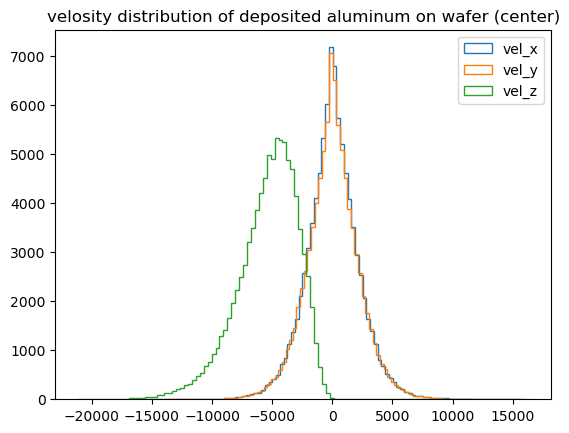

In [38]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

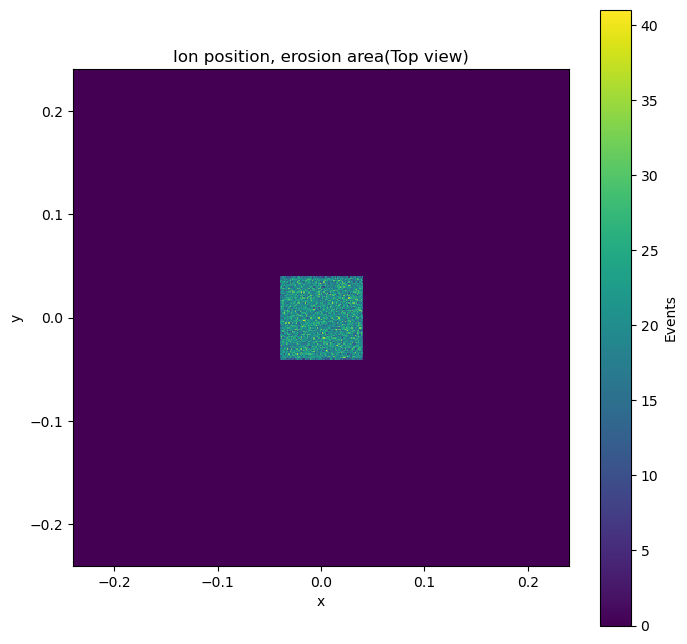

In [39]:
x_erosion_np = center_depo[:,0]
y_erosion_np = center_depo[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [48]:
edge_indices = np.logical_or(a[:,0] < 0.14, a[:,0] > 0.22)
edge_indices |= np.logical_or(a[:,1] < -0.04, a[:,1] > 0.04)
edge_indices |= np.array(a[:,2] > 0.2)
if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(64399, 6)


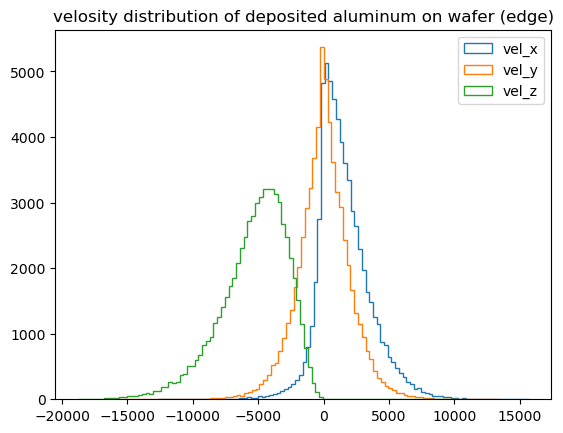

In [49]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

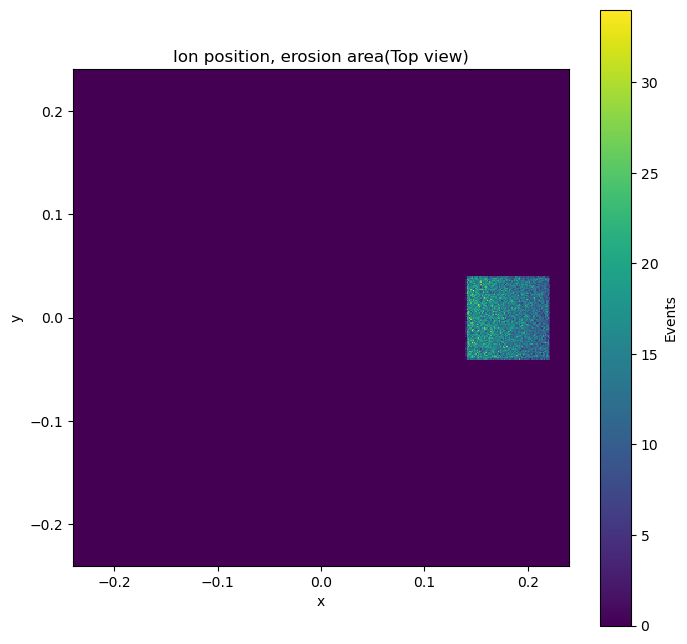

In [50]:
x_erosion_np = edge_depo[:,0]
y_erosion_np = edge_depo[:,1]

xbins = np.linspace(-0.24,0.24,400)
ybins = np.linspace(-0.24,0.24,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [51]:
for i in range(1):
    center_depo = np.concatenate((center_depo, center_depo), axis=0)

print(center_depo.shape)

(184988, 6)


In [52]:
import depoSimulator_symmetry

In [65]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [68]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=9)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x208e70d92d0_9&reconnect=auto" class="pyvis…

In [54]:
print(center_depo[:, 3:].shape)

(184988, 3)


In [55]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4)
deposit = test.run_afterCollision(1, 125, center_depo[:, 3:])

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
4
6
6
12
29
32
28
28
48
38
65
62
86
86
93
122
129
111
161
181
174
212
205
18
18
21
24
32
24
25
26
40
31
28
22
21
15
19
23
24
32
22
18
30
24
23
26
22
20
31
29
25
19
20
35
34
20
23
28
26
27
32
27
24
36
30
26
37
25
23
42
31
35
34
34
22
28
26
30
32
24
32
26
36
36
27
37
34
28
38
42
33
21
37
36
30
32
39
27
35
33
30
35
43
37
48
50
36
38
48
28
45
37
47
42
25
48
34
25
39
31
27
29
51
45
51
40
45
32
38
49
37
28
37
49
49
29
51
45
35
38
43
45
55
48
36
43
44
37
46
48
42
43
48
49
52
43
51
33
56
58
58
52
49
52
52
66
51
52
48
53
48
60
51
43
58
46
50
63
58
46
59
57
49
55
53
51
55
61
48
58
56
56
47
53
56
60
57
48
50
68
53
65
58
50
59
62
51
58
60
52
53
51
62
56
72
74
65
55
56
53
47
74
77
56
63
69
68
66
74
65
72
55
81
84
69
64
67
91
84
77
69
74
67
70
55
70
74
56
76
69
68
62
67
64
79
76
85
71
67
71
86
84
72
62
71
79
71
80
79
78
93
73
70
59
74
76
80
93
59
91
87
68
81
81
91
59
78
82
91
95
66
85
84
87
76
64
86
86
81
85


running:   1%|▌                                                  | 1.00/100 [07:05<11:42:31, 426s/B]

113
135
105
107
119
110
127
131
122
116
99
110
106
115
121
104
98
112
111
117
107
105
107
124
109
128
132
129
116
117
98
103
106
100
110
102
110
91
106
95
120
107
111
94
98
100
130
108
108
120
111
135
102
102
116
92
91
116
120
118
100
98
108
84
99
120
85
99
100
107
110
95
112
110
91
108
91
97
91
111
117
96
106
91
111
113
115
86
111
86
95
121
107
103
85
98
92
114
118
99
83
95
103
95
85
109
72
83
97
107
105
104
110
97
89
113
99
77
101
106
85
88
80
110
93
95
93
95
110
102
94
85
80
92
93
102
84
94
96
106
116
72
113
113
90
97
99
98
95
100
97
100
88
95
110
126
82
80
92
80
82
104
96
93
85
108
96
95
86
73
89
88
90
93
110
101
92
93
87
95
94
84
82
92
85
104
97
79
77
86
95
81
67
89
100
81
84
92
85
87
86
80
68
81
98
90
86
108
89
77
84
90
88
76
89
85
70
85
94
89
89
83
84
79
82
87
83
76
72
73
69
93
84
67
64
86
84
81
85
82
90
82
73
72
79
85
93
62
78
83
84
93
74
67
79
75
88
86
87
77
78
84
73
84
78
71
69
64
89
78
83
83
80
86
73
67
72
82
74
75
69
107
98
66
67
79
71
69
78
63
89
73
74
75
72
76
83
63
83
79

running:   2%|█                                                  | 2.00/100 [12:53<10:20:20, 380s/B]

33
32
24
25
28
21
26
24
12
27
22
16
17
24
33
22
23
24
29
16
19
34
22
22
18
23
21
22
25
27
39
33
22
25
21
23
18
28
25
20
20
21
27
21
29
21
30
21
24
25
27
16
28
20
20
30
13
34
17
25
14
21
19
29
26
25
16
16
28
20
22
24
22
24
24
23
24
16
21
29
21
18
24
24
21
22
24
21
17
17
23
19
21
23
26
15
25
16
20
18
32
23
18
14
23
25
27
22
13
28
18
25
29
21
14
9
16
1725
1710
1537
1364
1218


running:   3%|█▌                                                  | 3.00/100 [13:34<6:04:09, 225s/B]

1089
959
906
813
755
655
577
492
484
420


running:   4%|██                                                  | 4.00/100 [13:38<3:40:15, 138s/B]

412
361
304
294
250
236
220
219
201
173


running:   5%|██▌                                                | 5.00/100 [13:41<2:21:28, 89.3s/B]

158
137
138
107
129
112
89
86
80
75


running:   6%|███                                                | 6.00/100 [13:45<1:34:14, 60.2s/B]

87
79
84
72
52
45
55
62
41
46


running:   7%|███▌                                               | 7.00/100 [13:48<1:04:27, 41.6s/B]

36
50
36
32
31
34
29
31
22
22


running:   8%|████▏                                                | 8.00/100 [13:52<45:12, 29.5s/B]

36
26
25
23
32
22
15
15
15
9


running:   9%|████▊                                                | 9.00/100 [13:55<32:16, 21.3s/B]

12
17
8
18
14
10
17
11
12
14


running:  10%|█████▎                                               | 10.0/100 [13:58<23:37, 15.8s/B]

10
10
9
14
5
6
4
8
9
6


running:  11%|█████▊                                               | 11.0/100 [14:02<17:39, 11.9s/B]

2
7
6
5
5
9
6
2
2
4


running:  12%|██████▎                                              | 12.0/100 [14:05<13:35, 9.27s/B]

4
6
1
6
8
4
4
6
5
3


running:  13%|██████▉                                              | 13.0/100 [14:08<10:46, 7.44s/B]

3
5
3
6
2
3
6
4
7
1


running:  14%|███████▍                                             | 14.0/100 [14:11<08:50, 6.17s/B]

3
3
2
4
4
2
1
1
2
2


running:  15%|███████▉                                             | 15.0/100 [14:14<07:23, 5.21s/B]

0
4
2
3
2
2
2
1
1
2


running:  16%|████████▍                                            | 16.0/100 [14:18<06:29, 4.63s/B]

3
4
2
2
1
3
0
4
1
5


running:  17%|█████████                                            | 17.0/100 [14:21<05:49, 4.21s/B]

0
3
1
2
1
1
2
2
4
1


running:  18%|█████████▌                                           | 18.0/100 [14:24<05:16, 3.86s/B]

0
1
0
2
0
0
1
0
1
1


running:  19%|██████████                                           | 19.0/100 [14:27<04:55, 3.65s/B]

1
1
2
0
0
1
0
0
0
1


running:  20%|██████████▌                                          | 20.0/100 [14:30<04:42, 3.53s/B]

1
0
1
2
0
0
0
1
0
0


running:  21%|███████████▏                                         | 21.0/100 [14:34<04:35, 3.49s/B]

0
0
0
0
0
1
1
1
0
2


running:  22%|███████████▋                                         | 22.0/100 [14:37<04:21, 3.36s/B]

1
1
0
1
0
1
1
0
1
0


running:  23%|████████████▏                                        | 23.0/100 [14:40<04:12, 3.28s/B]

1
1
0
1
1
0
0
0
0
2


running:  24%|████████████▋                                        | 24.0/100 [14:43<04:03, 3.21s/B]

1
1
0
0
1
0
0
0
1
0


running:  25%|█████████████▎                                       | 25.0/100 [14:46<04:00, 3.20s/B]

0
2
0
0
0
1
0
0
0
0


running:  26%|█████████████▊                                       | 26.0/100 [14:49<03:59, 3.23s/B]

0
0
1
0
0
1
1
0
1
0


running:  27%|██████████████▎                                      | 27.0/100 [14:52<03:54, 3.21s/B]

0
0
0
0
0
1
0
0
1
0


running:  28%|██████████████▊                                      | 28.0/100 [14:56<03:51, 3.21s/B]

1
0
1
2
1
0
0
0
0
0


running:  29%|███████████████▎                                     | 29.0/100 [14:59<03:45, 3.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  30%|███████████████▉                                     | 30.0/100 [15:02<03:43, 3.20s/B]

0
0
2
0
0
0
0
0
0
0


running:  31%|████████████████▍                                    | 31.0/100 [15:05<03:42, 3.22s/B]

0
0
0
1
1
0
0
1
0
0


running:  32%|████████████████▉                                    | 32.0/100 [15:08<03:37, 3.20s/B]

0
1
0
0
0
0
0
1
0
0


running:  33%|█████████████████▍                                   | 33.0/100 [15:12<03:33, 3.19s/B]

0
0
1
0
0
1
0
0
0
0


running:  34%|██████████████████                                   | 34.0/100 [15:15<03:29, 3.17s/B]

0
0
0
0
1
0
0
0
0
0


running:  35%|██████████████████▌                                  | 35.0/100 [15:18<03:28, 3.20s/B]

0
0
0
0
0
0
0
1
0
0


running:  36%|███████████████████                                  | 36.0/100 [15:21<03:26, 3.22s/B]

0
0
0
0
0
1
0
0
0
0


running:  37%|███████████████████▌                                 | 37.0/100 [15:25<03:24, 3.25s/B]

2
1
0
0
1
0
0
1
0
1


running:  38%|████████████████████▏                                | 38.0/100 [15:28<03:19, 3.22s/B]

0
1
0
0
2
0
0
0
0
0


running:  39%|████████████████████▋                                | 39.0/100 [15:31<03:14, 3.19s/B]

0
0
0
0
0
0
0
0
0
0


running:  40%|█████████████████████▏                               | 40.0/100 [15:34<03:11, 3.18s/B]

0
1
0
0
0
0
0
0
0
0


running:  41%|█████████████████████▋                               | 41.0/100 [15:37<03:12, 3.27s/B]

0
0
0
0
1
0
0
0
0
0


running:  42%|██████████████████████▎                              | 42.0/100 [15:41<03:08, 3.25s/B]

0
0
0
0
0
0
0
0
1
0


running:  43%|██████████████████████▊                              | 43.0/100 [15:44<03:03, 3.22s/B]

0
0
0
0
0
0
0
0
0
0


running:  44%|███████████████████████▎                             | 44.0/100 [15:47<03:01, 3.24s/B]

0
0
0
0
0
0
0
0
0
0


running:  45%|███████████████████████▊                             | 45.0/100 [15:51<03:01, 3.30s/B]

0
0
0
0
1
0
0
0
0
0


running:  46%|████████████████████████▍                            | 46.0/100 [15:54<02:56, 3.27s/B]

0
0
1
0
0
0
0
0
0
0


running:  47%|████████████████████████▉                            | 47.0/100 [15:57<02:52, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  48%|█████████████████████████▍                           | 48.0/100 [16:00<02:47, 3.22s/B]

0
0
0
0
0
0
0
0
0
0


running:  49%|█████████████████████████▉                           | 49.0/100 [16:03<02:45, 3.24s/B]

0
0
0
0
0
0
0
0
0
0


running:  50%|██████████████████████████▌                          | 50.0/100 [16:07<02:47, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  51%|███████████████████████████                          | 51.0/100 [16:10<02:44, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  52%|███████████████████████████▌                         | 52.0/100 [16:14<02:40, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  53%|████████████████████████████                         | 53.0/100 [16:17<02:37, 3.35s/B]

0
0
0
0
0
0
0
0
0
0


running:  54%|████████████████████████████▌                        | 54.0/100 [16:20<02:34, 3.35s/B]

0
0
0
0
0
0
0
0
0
0


running:  55%|█████████████████████████████▏                       | 55.0/100 [16:24<02:31, 3.37s/B]

0
0
0
0
0
0
0
0
0
0


running:  56%|█████████████████████████████▋                       | 56.0/100 [16:27<02:25, 3.31s/B]

0
0
0
0
0
0
0
0
0
0


running:  57%|██████████████████████████████▏                      | 57.0/100 [16:30<02:22, 3.32s/B]

0
0
0
0
0
0
0
0
0
0


running:  58%|██████████████████████████████▋                      | 58.0/100 [16:33<02:17, 3.27s/B]

0
0
0
0
0
0
0
0
0
0


running:  59%|███████████████████████████████▎                     | 59.0/100 [16:37<02:14, 3.28s/B]

0
0
0
0
0
0
0
0
0
0


running:  60%|███████████████████████████████▊                     | 60.0/100 [16:40<02:12, 3.30s/B]

0
0
0
0
0
0
0
0
0
0


running:  61%|████████████████████████████████▎                    | 61.0/100 [16:43<02:06, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  62%|████████████████████████████████▊                    | 62.0/100 [16:47<02:03, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  63%|█████████████████████████████████▍                   | 63.0/100 [16:50<02:03, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  64%|█████████████████████████████████▉                   | 64.0/100 [16:53<02:00, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  65%|██████████████████████████████████▍                  | 65.0/100 [16:57<01:59, 3.41s/B]

0
0
0
0
0
0
0
0
0
0


running:  66%|██████████████████████████████████▉                  | 66.0/100 [17:00<01:54, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  67%|███████████████████████████████████▌                 | 67.0/100 [17:04<01:51, 3.38s/B]

0
0
0
0
0
0
0
0
0
0


running:  68%|████████████████████████████████████                 | 68.0/100 [17:07<01:47, 3.37s/B]

0
0
0
0
0
0
0
0
0
0


running:  69%|████████████████████████████████████▌                | 69.0/100 [17:10<01:43, 3.33s/B]

0
0
0
0
0
0
0
0
0
0


running:  70%|█████████████████████████████████████                | 70.0/100 [17:14<01:40, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  71%|█████████████████████████████████████▋               | 71.0/100 [17:17<01:36, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  72%|██████████████████████████████████████▏              | 72.0/100 [17:20<01:34, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  73%|██████████████████████████████████████▋              | 73.0/100 [17:24<01:28, 3.29s/B]

0
0
0
0
0
0
0
0
0
0


running:  74%|███████████████████████████████████████▏             | 74.0/100 [17:27<01:26, 3.31s/B]

0
0
0
0
0
0
0
0
0
0


running:  75%|███████████████████████████████████████▊             | 75.0/100 [17:30<01:23, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  76%|████████████████████████████████████████▎            | 76.0/100 [17:33<01:19, 3.29s/B]

0
0
0
0
0
0
0
0
0
0


running:  77%|████████████████████████████████████████▊            | 77.0/100 [17:37<01:16, 3.31s/B]

0
0
0
0
0
0
0
0
0
0


running:  78%|█████████████████████████████████████████▎           | 78.0/100 [17:40<01:13, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  79%|█████████████████████████████████████████▊           | 79.0/100 [17:44<01:10, 3.36s/B]

0
0
0
0
0
0
0
0
0
0


running:  80%|██████████████████████████████████████████▍          | 80.0/100 [17:47<01:07, 3.37s/B]

0
0
0
0
0
0
0
0
0
0


running:  81%|██████████████████████████████████████████▉          | 81.0/100 [17:51<01:04, 3.41s/B]

0
0
0
0
0
0
0
0
0
0


running:  82%|███████████████████████████████████████████▍         | 82.0/100 [17:54<01:01, 3.39s/B]

0
0
0
0
0
0
0
0
0
0


running:  83%|███████████████████████████████████████████▉         | 83.0/100 [17:57<00:57, 3.40s/B]

0
0
0
0
0
0
0
0
0
0


running:  84%|████████████████████████████████████████████▌        | 84.0/100 [18:01<00:54, 3.39s/B]

0
0
0
0
0
0
0
0
0
0


running:  85%|█████████████████████████████████████████████        | 85.0/100 [18:04<00:50, 3.37s/B]

0
0
0
0
0
0
0
0
0
0


running:  86%|█████████████████████████████████████████████▌       | 86.0/100 [18:07<00:47, 3.38s/B]

0
0
0
1
0
0
0
0
0
0


running:  87%|██████████████████████████████████████████████       | 87.0/100 [18:11<00:43, 3.33s/B]

0
0
0
0
0
0
0
0
0
1


running:  88%|██████████████████████████████████████████████▋      | 88.0/100 [18:14<00:39, 3.27s/B]

0
0
0
0
0
0
0
0
0
0


running:  89%|███████████████████████████████████████████████▏     | 89.0/100 [18:17<00:35, 3.21s/B]

0
0
0
0
0
0
0
0
0
0


running:  90%|███████████████████████████████████████████████▋     | 90.0/100 [18:20<00:31, 3.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  91%|████████████████████████████████████████████████▏    | 91.0/100 [18:23<00:29, 3.23s/B]

0
0
0
0
0
0
0
0
0
0


running:  92%|████████████████████████████████████████████████▊    | 92.0/100 [18:26<00:25, 3.22s/B]

0
0
0
0
0
0
0
0
0
0


running:  93%|█████████████████████████████████████████████████▎   | 93.0/100 [18:30<00:22, 3.20s/B]

0
0
0
0
0
0
0
0
0
0


running:  94%|█████████████████████████████████████████████████▊   | 94.0/100 [18:33<00:19, 3.23s/B]

0
0
0
0
0
0
0
0
0
0


running:  95%|██████████████████████████████████████████████████▎  | 95.0/100 [18:36<00:16, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  96%|██████████████████████████████████████████████████▉  | 96.0/100 [18:39<00:13, 3.26s/B]

0
0
0
0
0
0
0
0
0
0


running:  97%|███████████████████████████████████████████████████▍ | 97.0/100 [18:43<00:09, 3.24s/B]

0
0
0
0
0
0
0
0
0
0


running:  98%|███████████████████████████████████████████████████▉ | 98.0/100 [18:46<00:06, 3.27s/B]

0
0
0
0
0
0
0
0
0
0


running:  99%|████████████████████████████████████████████████████▍| 99.0/100 [18:49<00:03, 3.29s/B]

0
0
0
0
0
0
0


running:  99%|████████████████████████████████████████████████████▍| 99.0/100 [18:52<00:11, 11.4s/B]


In [24]:
deposit = test.run_afterCollision(2, 88, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:34<00:00, 2.15s/B]


In [23]:
deposit = test.run_afterCollision(1, 1035, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [04:21<00:00, 2.61s/B]


In [25]:
deposit = test.run_afterCollision(1, 1037, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:46<00:00, 2.27s/B]


In [56]:
np.save('./TScompare/TS300_afterCollision_0529_v2_run1_t1e-5_p4e6', deposit)

In [64]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x208a9579fd0_6&reconnect=auto" class="pyvis…

In [59]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x208a82724d0_2&reconnect=auto" class="pyvis…

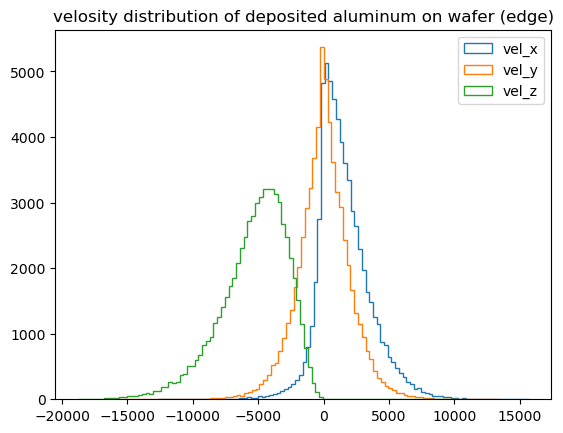

In [60]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [70]:
for i in range(1):
    edge_depo = np.concatenate((edge_depo, edge_depo), axis=0)

print(edge_depo.shape)

(128798, 6)


In [72]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = edge_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4)
deposit = test.run_afterCollision(1, 125, edge_depo[:, 3:])

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
1
1
6
2
15
13
20
15
21
36
32
32
66
50
76
72
84
88
94
106
118
142
131
157
151
153
185
206
192
34
18
21
25
22
26
28
18
26
22
20
32
14
24
16
21
17
25
22
20
20
24
24
24
25
25
18
23
21
35
19
22
25
27
26
27
26
23
23
28
31
24
20
28
26
30
26
31
27
24
26
23
26
33
30
31
29
15
32
33
25
38
38
27
24
30
29
37
30
25
29
34
26
27
34
26
38
32
28
23
37
31
28
29
37
26
29
37
31
39
35
37
42
44
35
41
35
36
39
35
46
19
26
37
33
36
38
43
32
37
45
32
54
45
37
50
49
46
30
40
20
43
33
43
36
43
32
35
27
26
51
44
53
42
28
38
42
39
47
39
31
44
38
30
42
45
43
54
52
43
48
34
52
54
40
47
37
41
28
48
42
46
42
38
43
48
48
38
50
47
41
60
45
43
54
53
39
54
46
43
47
37
48
59
43
49
42
51
46
56
42
38
52
62
46
65
52
49
57
57
48
61
56
49
59
51
65
56
52
45
43
53
49
44
62
50
61
53
42
65
47
46
45
59
56
47
39
46
56
63
67
68
49
37
59
58
62
66
57
67
60
64
55
63
57
54
44
55
56
59
62
67
59
58
56
57
61
51
41
38
57
61
61
61
70
75
56
62
66
52
62
63
6

running:   1%|▌                                                  | 1.00/100 [06:59<11:32:57, 420s/B]

66
69
67
61
62
70
58
65
63
75
59
71
80
73
81
58
61
62
65
63
64
61
73
77
67
64
68
70
74
70
66
60
83
67
70
64
56
69
69
68
73
60
62
65
80
75
63
76
82
62
67
79
90
67
77
73
80
69
62
68
80
66
79
65
70
53
77
61
60
58
59
79
61
65
60
67
68
59
69
62
58
57
74
51
51
65
65
61
59
68
56
57
59
56
69
59
61
48
49
58
64
57
61
69
72
55
45
63
60
61
57
63
63
53
72
68
75
72
57
55
72
63
61
56
59
71
52
60
64
68
67
57
56
57
62
62
46
53
56
54
53
48
47
59
71
54
57
68
54
58
65
57
82
64
61
60
56
55
62
61
62
62
52
51
53
45
58
54
64
66
56
70
66
55
46
64
67
52
50
59
56
52
56
49
51
57
65
58
45
60
54
66
61
50
62
56
60
56
53
59
62
64
48
62
59
60
66
52
68
51
65
53
46
51
62
55
46
54
59
45
51
56
62
62
56
53
58
47
48
59
51
52
50
56
52
47
58
52
49
61
61
48
56
51
52
52
58
62
47
52
55
57
36
48
45
62
59
56
52
52
55
60
56
61
60
53
64
46
59
48
59
62
62
51
58
59
53
56
43
48
47
48
52
43
53
57
38
57
44
50
57
47
51
55
59
68
42
47
43
63
58
64
51
56
57
50
40
42
38
48
42
43
58
48
47
39
50
49
45
53
46
59
44
44
62
50
63
38
59
63
41
49
57
4

running:   2%|█                                                  | 2.00/100 [13:22<10:50:01, 398s/B]

21
20
13
32
11
17
17
22
12
12
23
20
19
25
20
15
17
27
22
24
17
24
17
19
12
21
24
16
24
20
20
17
23
19
16
20
18
24
21
17
19
21
19
17
19
17
29
21
22
21
15
26
24
19
18
16
27
24
19
26
12
17
23
14
19
21
15
16
22
19
24
11
18
18
21
12
14
17
17
18
14
14
14
14
15
14
18
12
15
15
16
15
19
17
20
11
15
22
12
11
22
20
15
14
15
14
15
12
16
18
17
21
23
19
14
13
19
20
23
21
19
19
17
25
14
11
23
18
17
17
8
11


running:   3%|█▌                                                  | 3.00/100 [14:11<6:25:49, 239s/B]

1375
1402
1249
1132
1018
894
848
771
653
632


running:   4%|██                                                  | 4.00/100 [14:15<3:53:29, 146s/B]

548
473
453
425
379
355
336
276
288
258


running:   5%|██▌                                                | 5.00/100 [14:19<2:29:50, 94.6s/B]

229
237
196
150
168
163
137
114
138
111


running:   6%|███                                                | 6.00/100 [14:22<1:39:48, 63.7s/B]

93
86
110
77
81
68
72
84
68
49


running:   7%|███▌                                               | 7.00/100 [14:26<1:08:21, 44.1s/B]

67
55
53
40
33
30
42
40
41
34


running:   8%|████▏                                                | 8.00/100 [14:30<47:49, 31.2s/B]

34
25
28
24
22
29
27
21
19
13


running:   9%|████▊                                                | 9.00/100 [14:33<34:15, 22.6s/B]

15
14
16
20
15
18
18
15
14
16


running:  10%|█████▎                                               | 10.0/100 [14:37<25:06, 16.7s/B]

12
12
10
12
15
10
5
7
9
7


running:  11%|█████▊                                               | 11.0/100 [14:41<18:55, 12.8s/B]

7
2
7
10
3
5
8
4
6
4


running:  12%|██████▎                                              | 12.0/100 [14:44<14:42, 10.0s/B]

4
5
6
8
3
2
2
3
6
4


running:  13%|██████▉                                              | 13.0/100 [14:48<11:44, 8.09s/B]

7
6
3
3
5
1
5
5
5
1


running:  14%|███████▍                                             | 14.0/100 [14:52<09:42, 6.77s/B]

1
2
2
2
2
3
2
1
3
2


running:  15%|███████▉                                             | 15.0/100 [14:55<08:15, 5.83s/B]

2
5
1
5
2
3
1
1
2
1


running:  16%|████████▍                                            | 16.0/100 [14:59<07:17, 5.21s/B]

1
0
0
0
3
2
2
1
2
4


running:  17%|█████████                                            | 17.0/100 [15:03<06:26, 4.66s/B]

2
0
0
1
0
0
0
2
3
1


running:  18%|█████████▌                                           | 18.0/100 [15:06<05:48, 4.25s/B]

1
2
0
2
1
0
1
2
0
3


running:  19%|██████████                                           | 19.0/100 [15:09<05:17, 3.92s/B]

2
1
1
3
2
3
2
1
1
1


running:  20%|██████████▌                                          | 20.0/100 [15:12<04:57, 3.72s/B]

0
1
1
0
1
0
1
2
1
0


running:  21%|███████████▏                                         | 21.0/100 [15:15<04:41, 3.56s/B]

1
3
1
0
3
0
1
1
1
3


running:  22%|███████████▋                                         | 22.0/100 [15:19<04:31, 3.48s/B]

0
1
0
0
0
0
1
0
1
2


running:  23%|████████████▏                                        | 23.0/100 [15:22<04:24, 3.43s/B]

0
0
1
0
1
1
1
0
2
2


running:  24%|████████████▋                                        | 24.0/100 [15:25<04:20, 3.42s/B]

2
1
1
0
0
0
0
0
0
0


running:  25%|█████████████▎                                       | 25.0/100 [15:28<04:07, 3.30s/B]

1
1
0
0
1
1
1
0
2
0


running:  26%|█████████████▊                                       | 26.0/100 [15:32<04:03, 3.29s/B]

1
1
0
0
0
0
0
0
1
0


running:  27%|██████████████▎                                      | 27.0/100 [15:35<04:01, 3.30s/B]

0
0
1
0
0
0
0
1
0
0


running:  28%|██████████████▊                                      | 28.0/100 [15:38<03:55, 3.28s/B]

0
1
0
0
0
0
0
0
0
0


running:  29%|███████████████▎                                     | 29.0/100 [15:42<03:52, 3.28s/B]

0
0
0
0
0
0
0
0
0
0


running:  30%|███████████████▉                                     | 30.0/100 [15:45<03:50, 3.29s/B]

0
0
0
1
1
0
0
0
0
0


running:  31%|████████████████▍                                    | 31.0/100 [15:48<03:47, 3.30s/B]

1
0
0
0
0
0
0
0
0
0


running:  32%|████████████████▉                                    | 32.0/100 [15:52<03:44, 3.30s/B]

0
1
0
1
0
0
0
0
0
0


running:  33%|█████████████████▍                                   | 33.0/100 [15:55<03:40, 3.29s/B]

0
0
0
0
0
0
0
1
0
0


running:  34%|██████████████████                                   | 34.0/100 [15:58<03:37, 3.29s/B]

0
0
0
0
1
0
0
0
0
0


running:  35%|██████████████████▌                                  | 35.0/100 [16:01<03:34, 3.30s/B]

1
0
0
0
0
2
0
0
1
0


running:  36%|███████████████████                                  | 36.0/100 [16:05<03:28, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  37%|███████████████████▌                                 | 37.0/100 [16:08<03:25, 3.26s/B]

0
0
0
0
1
0
0
0
0
0


running:  38%|████████████████████▏                                | 38.0/100 [16:11<03:20, 3.24s/B]

1
0
0
0
0
0
1
0
0
0


running:  39%|████████████████████▋                                | 39.0/100 [16:14<03:20, 3.29s/B]

0
0
0
1
0
0
0
0
0
0


running:  40%|█████████████████████▏                               | 40.0/100 [16:18<03:19, 3.32s/B]

0
0
0
0
0
0
0
0
0
0


running:  41%|█████████████████████▋                               | 41.0/100 [16:21<03:16, 3.32s/B]

0
1
0
0
0
1
0
1
0
0


running:  42%|██████████████████████▎                              | 42.0/100 [16:25<03:13, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  43%|██████████████████████▊                              | 43.0/100 [16:28<03:10, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  44%|███████████████████████▎                             | 44.0/100 [16:31<03:06, 3.33s/B]

0
0
0
0
0
0
0
0
0
0


running:  45%|███████████████████████▊                             | 45.0/100 [16:35<03:05, 3.37s/B]

0
0
0
0
0
0
0
0
0
0


running:  46%|████████████████████████▍                            | 46.0/100 [16:38<03:02, 3.37s/B]

0
0
0
0
0
0
1
0
0
0


running:  47%|████████████████████████▉                            | 47.0/100 [16:42<03:00, 3.41s/B]

0
0
0
0
0
0
0
0
0
0


running:  48%|█████████████████████████▍                           | 48.0/100 [16:45<03:05, 3.56s/B]

0
0
0
0
0
0
0
0
0
0


running:  49%|█████████████████████████▉                           | 49.0/100 [16:49<03:05, 3.63s/B]

0
0
0
0
0
0
0
0
0
0


running:  50%|██████████████████████████▌                          | 50.0/100 [16:53<03:02, 3.65s/B]

0
0
1
0
0
0
0
0
0
0


running:  51%|███████████████████████████                          | 51.0/100 [16:57<02:59, 3.67s/B]

0
0
0
0
0
0
0
0
0
0


running:  52%|███████████████████████████▌                         | 52.0/100 [17:00<02:54, 3.64s/B]

0
0
0
0
0
0
0
0
0
0


running:  53%|████████████████████████████                         | 53.0/100 [17:04<02:52, 3.68s/B]

0
0
0
0
0
1
0
0
0
0


running:  54%|████████████████████████████▌                        | 54.0/100 [17:08<02:51, 3.73s/B]

0
1
0
0
0
0
0
0
0
0


running:  55%|█████████████████████████████▏                       | 55.0/100 [17:11<02:46, 3.70s/B]

0
0
0
0
0
0
0
0
0
0


running:  56%|█████████████████████████████▋                       | 56.0/100 [17:15<02:41, 3.68s/B]

0
0
0
0
0
0
0
0
0
0


running:  57%|██████████████████████████████▏                      | 57.0/100 [17:19<02:38, 3.69s/B]

0
0
0
0
0
0
0
0
0
0


running:  58%|██████████████████████████████▋                      | 58.0/100 [17:22<02:34, 3.69s/B]

0
0
0
0
0
0
0
0
0
0


running:  59%|███████████████████████████████▎                     | 59.0/100 [17:26<02:31, 3.69s/B]

0
0
0
0
0
0
0
0
0
0


running:  60%|███████████████████████████████▊                     | 60.0/100 [17:30<02:27, 3.68s/B]

0
0
0
0
0
0
0
0
0
0


running:  61%|████████████████████████████████▎                    | 61.0/100 [17:33<02:23, 3.67s/B]

0
0
0
0
0
0
0
1
0
0


running:  62%|████████████████████████████████▊                    | 62.0/100 [17:37<02:19, 3.67s/B]

0
0
0
0
0
0
0
0
0
0


running:  63%|█████████████████████████████████▍                   | 63.0/100 [17:41<02:17, 3.70s/B]

0
0
0
0
0
0
0
0
0
0


running:  64%|█████████████████████████████████▉                   | 64.0/100 [17:45<02:13, 3.72s/B]

0
1
0
0
0
0
0
0
0
0


running:  65%|██████████████████████████████████▍                  | 65.0/100 [17:48<02:10, 3.71s/B]

0
1
1
0
0
0
0
0
0
0


running:  66%|██████████████████████████████████▉                  | 66.0/100 [17:52<02:02, 3.59s/B]

0
0
0
0
0
0
0
0
1
0


running:  67%|███████████████████████████████████▌                 | 67.0/100 [17:55<01:56, 3.53s/B]

0
0
0
0
0
0
0
0
0
0


running:  68%|████████████████████████████████████                 | 68.0/100 [17:58<01:50, 3.46s/B]

0
0
0
0
0
0
0
0
0
0


running:  69%|████████████████████████████████████▌                | 69.0/100 [18:02<01:46, 3.45s/B]

0
0
0
0
0
0
0
0
0
0


running:  70%|█████████████████████████████████████                | 70.0/100 [18:05<01:42, 3.41s/B]

0
0
0
0
0
0
0
0
0
0


running:  71%|█████████████████████████████████████▋               | 71.0/100 [18:09<01:38, 3.40s/B]

0
0
0
0
0
0
0
0
0
0


running:  72%|██████████████████████████████████████▏              | 72.0/100 [18:12<01:34, 3.38s/B]

0
0
0
0
0
0
0
0
0
0


running:  73%|██████████████████████████████████████▋              | 73.0/100 [18:15<01:31, 3.41s/B]

0
0
0
0
0
0
0
0
1
0


running:  74%|███████████████████████████████████████▏             | 74.0/100 [18:19<01:27, 3.38s/B]

0
0
0
0
0
0
0
0
0
0


running:  75%|███████████████████████████████████████▊             | 75.0/100 [18:22<01:23, 3.35s/B]

0
0
0
0
1
0
0
0
0
0


running:  76%|████████████████████████████████████████▎            | 76.0/100 [18:25<01:20, 3.35s/B]

0
0
0
0
0
0
0
0
0
0


running:  77%|████████████████████████████████████████▊            | 77.0/100 [18:29<01:17, 3.36s/B]

0
0
0
0
0
0
0
0
1
0


running:  78%|█████████████████████████████████████████▎           | 78.0/100 [18:32<01:14, 3.39s/B]

0
0
1
0
0
0
0
0
0
0


running:  79%|█████████████████████████████████████████▊           | 79.0/100 [18:35<01:11, 3.39s/B]

0
0
0
0
0
0
0
0
0
0


running:  80%|██████████████████████████████████████████▍          | 80.0/100 [18:39<01:08, 3.41s/B]

0
0
0
0
0
0
0
1


running:  80%|██████████████████████████████████████████▍          | 80.0/100 [18:42<04:40, 14.0s/B]


In [73]:
np.save('./TScompare/TS300_afterCollision_0529_v2_run1_t1e-5_p4e6_edge', deposit)

In [74]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x20933e5a4d0_10&reconnect=auto" class="pyvi…

In [76]:
depo1 = torch.Tensor(deposit[20:68, 20:46, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:68, 20:48, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x20933e9c690_12&reconnect=auto" class="pyvi…

In [75]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x20933f22150_11&reconnect=auto" class="pyvi…